<a href="https://colab.research.google.com/github/HanifRafiq372/21102284_TI2_PPB2324-2/blob/main/Prediction%20and%20Detection%20Malware_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraires

In [531]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import (
    accuracy_score, f1_score, confusion_matrix, roc_curve, roc_auc_score,
    ConfusionMatrixDisplay
)

## Exploring the malware dataset. <br/>
Malware Dataset:https://github.com/PacktPublishing/Mastering-Machine-Learning-for-Penetration-Testing/blob/master/Chapter03/MalwareData.csv.gz <br/>
<br/>
* 41,323 binaries (exe ,dll) - legitimate
* 96,724 malware files from virusshare.com


In [532]:
malData=pd.read_csv("/content/MalwareData.csv", sep="|", low_memory =True )

In [533]:
# Prepare dataset
y = malData["legitimate"]
#malData = malData.drop(["md5"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(malData, y, test_size=0.2, random_state=42)

In [534]:
malData.head()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1


In [535]:
malData.shape

(138047, 57)

In [536]:
malData.describe()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
count,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,...,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000
mean,4259.069274,225.845632,4444.145994,8.619774,3.819286,2.425956e+05,4.504867e+05,1.009525e+05,1.719561e+05,5.779845e+04,...,22.050700,4.000127,2.434541,5.521610,5.545093e+04,1.818082e+04,2.465903e+05,4.656750e+05,12.363115,0.299340
std,10880.347245,5.121399,8186.782524,4.088757,11.862675,5.754485e+06,2.101599e+07,1.635288e+07,3.430553e+06,5.527658e+06,...,136.494244,1.112981,0.815577,1.597403,7.799163e+06,6.502369e+06,2.124860e+07,2.608987e+07,6.798878,0.457971
min,332.000000,224.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,332.000000,224.000000,258.000000,8.000000,0.000000,3.020800e+04,2.457600e+04,0.000000e+00,1.272100e+04,4.096000e+03,...,5.000000,3.458505,2.178748,4.828706,9.560000e+02,4.800000e+01,2.216000e+03,0.000000e+00,13.000000,0.000000
50%,332.000000,224.000000,258.000000,9.000000,0.000000,1.136640e+05,2.631680e+05,0.000000e+00,5.288300e+04,4.096000e+03,...,6.000000,3.729824,2.458492,5.317552,2.708154e+03,4.800000e+01,9.640000e+03,7.200000e+01,15.000000,0.000000
75%,332.000000,224.000000,8226.000000,10.000000,0.000000,1.203200e+05,3.850240e+05,0.000000e+00,6.157800e+04,4.096000e+03,...,13.000000,4.233051,2.696833,6.502239,6.558429e+03,1.320000e+02,2.378000e+04,7.200000e+01,16.000000,1.000000
max,34404.000000,352.000000,49551.000000,255.000000,255.000000,1.818587e+09,4.294966e+09,4.294941e+09,1.074484e+09,2.028711e+09,...,7694.000000,7.999723,7.999723,8.000000,2.415919e+09,2.415919e+09,4.294903e+09,4.294967e+09,26.000000,1.000000


In [537]:
legit= malData[0:41323] # Removing .drop(["legitimate"], axis=1)
mal= malData[41323::] # Removing .drop(["legitimate"], axis=1)
print("The shape of the legit dataset is: %s samples, %s features"%(legit.shape[0],legit.shape[1]))
print("The shape of the mal dataset is: %s samples, % s features" %(mal.shape[0],mal.shape[1]))

The shape of the legit dataset is: 41323 samples, 57 features
The shape of the mal dataset is: 96724 samples, 57 features


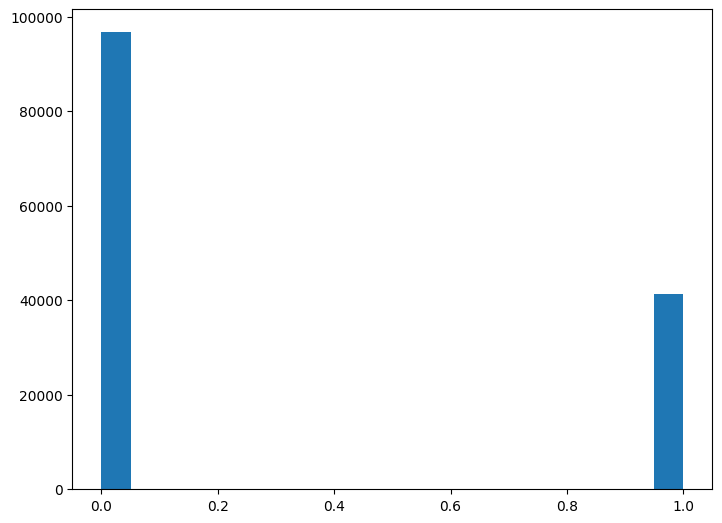

In [538]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.hist(y,20)  # Changed to 'y' to use the 'legitimate' values
plt.show()

# Data Cleaning

In [539]:
# Data Cleaning
# y=malData['legitimate']  # This line is causing the error
# malData=malData.drop(['legitimate'],axis=1) # Remove this line too
# Since you already have y assigned in a previous step,
# you don't need to do it again and then drop it.
malData=malData.drop(['Name'],axis=1)
malData=malData.drop(['md5'],axis=1)
print(" The Name and md5 variables are removed successfully")

 The Name and md5 variables are removed successfully


In [540]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2
# X_new = SelectKBest(chi2, k=2).fit_transform(malData, y)
# X_new.shape

# Spliting the dataset into test and train

In [541]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(malData,y, test_size=0.2, random_state=42)

In [542]:
X_train.shape

(110437, 55)

# Model Building </br> </br>
## 1- Random Forest

In [543]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import make_classification

clf = RandomForestClassifier(max_depth=2, random_state=0)

randomModel=clf.fit(X_train, y_train)



In [544]:
from sklearn.metrics import f1_score, accuracy_score, auc, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


In [545]:
# Inisialisasi model Random Forest dengan regularisasi
random_forest = RandomForestClassifier(
    n_estimators=100,      # Jumlah pohon
    max_depth=10,          # Kedalaman maksimum pohon
    min_samples_split=5,   # Minimum sampel untuk split
    min_samples_leaf=2,    # Minimum leaf
    random_state=42
)

In [546]:
#Train Model Random Forest
random_forest = RandomForestClassifier(max_depth=5, random_state=8)
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=8)

In [547]:
# Cross-validation untuk evaluasi
cv_scores = cross_val_score(random_forest, X_train, y_train, cv=5)

In [548]:
# Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [549]:
#  Accuracy on the train dataset

train_pred=randomModel.predict(X_train)

accuracy_score(y_train,train_pred)

0.9924753479359273

In [550]:
# Accuracy on the test dataset

prediction=randomModel.predict(X_test)

accuracy_score(y_test,prediction)

0.9927562477363274

In [551]:
# Evaluasi Akurasi dan F1-Score
y_pred_rf = random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print("Random Forest Results:")
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f}")
print(f"Test Accuracy: {accuracy_rf:.4f}")
print(f"Test F1-Score: {f1_rf:.4f}")

Random Forest Results:
Cross-Validation Accuracy: 0.9995
Test Accuracy: 0.9995
Test F1-Score: 0.9995


In [552]:
# Predictions
rf_train_pred = random_forest.predict(X_train)
rf_test_pred = random_forest.predict(X_test)

In [553]:
f1_score(y_test, prediction)

0.9880023995200959

In [554]:
# Evaluate Best Model
test_pred = best_rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)
print("Improved Test Accuracy:", test_accuracy)

Improved Test Accuracy: 1.0


<Figure size 800x600 with 0 Axes>

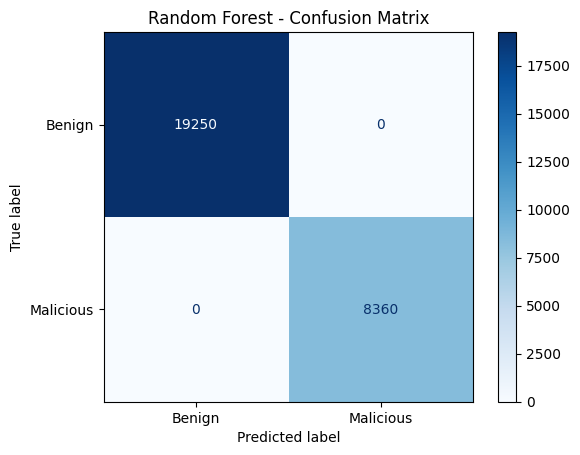

In [555]:
#Visualisasi Confusion Matrix
cm = confusion_matrix(y_test, test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malicious'])
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Random Forest - Confusion Matrix")
plt.show()

## Confusion matrix

Confusion matrix, without normalization
[[19175    75]
 [  125  8235]]


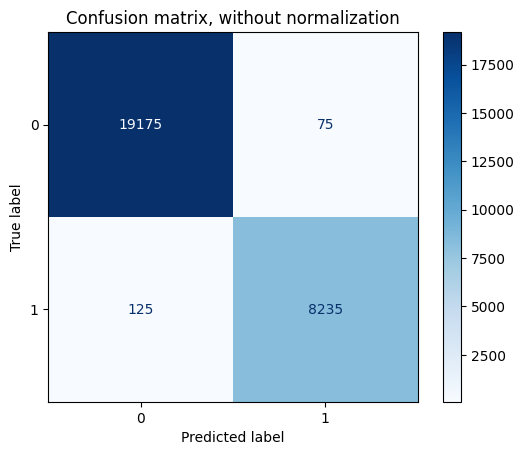

Normalized confusion matrix
[[0.9961039  0.0038961 ]
 [0.01495215 0.98504785]]


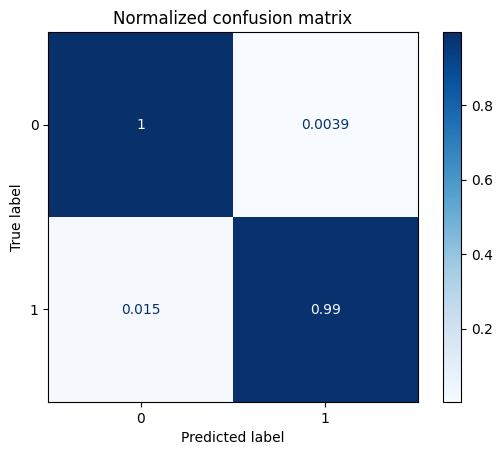

In [556]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        randomModel,
        X_test,
        y_test,
        # display_labels='legitimate', # The problem is with this line
        display_labels=[0, 1],  # Change to a list of labels for each class
        cmap=plt.cm.Blues,
        normalize=normalize
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

    plt.show()

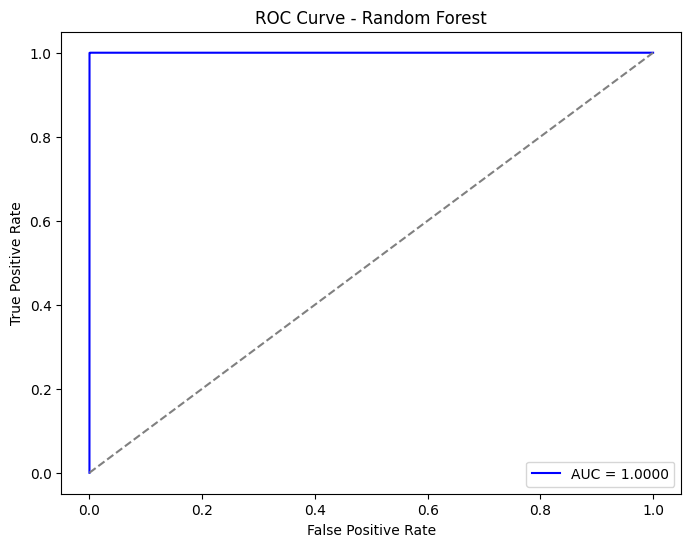

In [557]:
#ROC Curve dan AUC Score
y_probs = random_forest.predict_proba(X_test)[:, 1]  # Probabilitas kelas positif
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {auc:.4f}")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

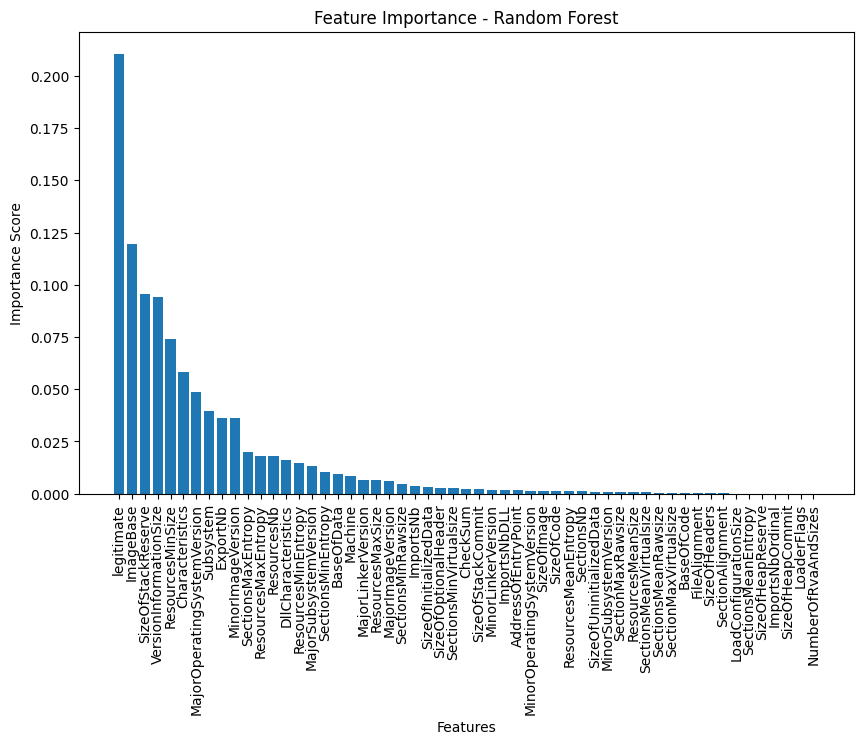

In [558]:
#Feature Importance
importances = random_forest.feature_importances_
features = X_train.columns # Changed X to X_train
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance - Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices], align="center") # Changed X to X_train
plt.xticks(range(X_train.shape[1]), features[indices], rotation=90) # Changed X to X_train
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

In [559]:
# Calculate the F1 score
from sklearn.metrics import f1_score

f1 = f1_score(y_test, prediction)  # Assuming 'prediction' holds the model predictions

In [560]:
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy (Train)", "Accuracy (Test)", "F1-Score", "AUC"],
    "Value": [train_accuracy, test_accuracy, f1, auc]
})

print("\nEvaluation Metrics for Random Forest:")
print(metrics_df)


Evaluation Metrics for Random Forest:
             Metric     Value
0  Accuracy (Train)  0.999303
1   Accuracy (Test)  1.000000
2          F1-Score  0.988002
3               AUC  0.999999


## 2 - Naive Bayes

In [561]:
# Import Library untuk Naive Bayes
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import StandardScaler # This line imports precision_recall_curve
from imblearn.pipeline import Pipeline

In [562]:
# Pipeline SMOTE + Scaling + Naive Bayes
nb_pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('classifier', GaussianNB())
])

nb_pipeline.fit(X_train, y_train)
nb_pred = nb_pipeline.predict(X_test)

In [563]:
# Handling class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [564]:
# Scaling fitur (optional untuk GaussianNB)
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

In [565]:
print("Naive Bayes Test Accuracy:", accuracy_score(y_test, nb_pred))
print("Naive Bayes Test F1-Score:", f1_score(y_test, nb_pred, average='weighted'))

Naive Bayes Test Accuracy: 1.0
Naive Bayes Test F1-Score: 1.0


## Model Evaluation

In [566]:
# 1. Train Model Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [567]:
# 2. Prediksi
nb_train_pred = nb_model.predict(X_train)
nb_test_pred = nb_model.predict(X_test)

In [568]:
# Evaluasi Akurasi dan F1-Score
y_pred_nb = naive_bayes.predict(X_test_scaled)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [569]:
# Metrics
print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb_test_pred))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.70      1.00      0.82     19250
           1       1.00      0.00      0.00      8360

    accuracy                           0.70     27610
   macro avg       0.85      0.50      0.41     27610
weighted avg       0.79      0.70      0.57     27610



In [570]:
f1_score(y_test, pred)


0.9236133122028526

In [571]:
print("Naive Bayes Results:")
print(f"Test Accuracy: {accuracy_nb:.4f}")
print(f"Test F1-Score: {f1_nb:.4f}")

Naive Bayes Results:
Test Accuracy: 0.6972
Test F1-Score: 0.5728


<Figure size 800x600 with 0 Axes>

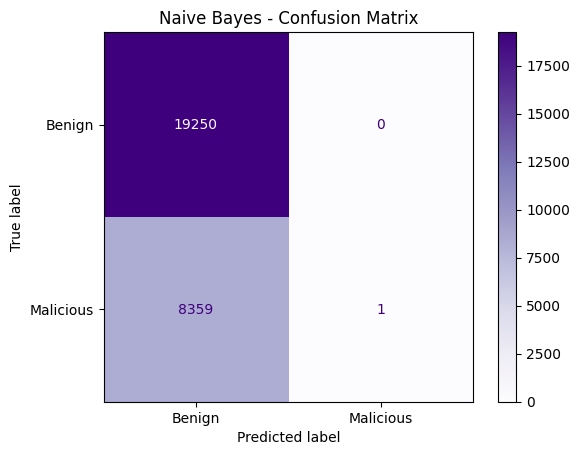

In [572]:
# 4. Confusion Matrix
nb_cm = confusion_matrix(y_test, nb_test_pred)
nb_disp = ConfusionMatrixDisplay(confusion_matrix=nb_cm, display_labels=['Benign', 'Malicious'])

plt.figure(figsize=(8, 6))
nb_disp.plot(cmap=plt.cm.Purples, values_format='d')
plt.title("Naive Bayes - Confusion Matrix")
plt.show()


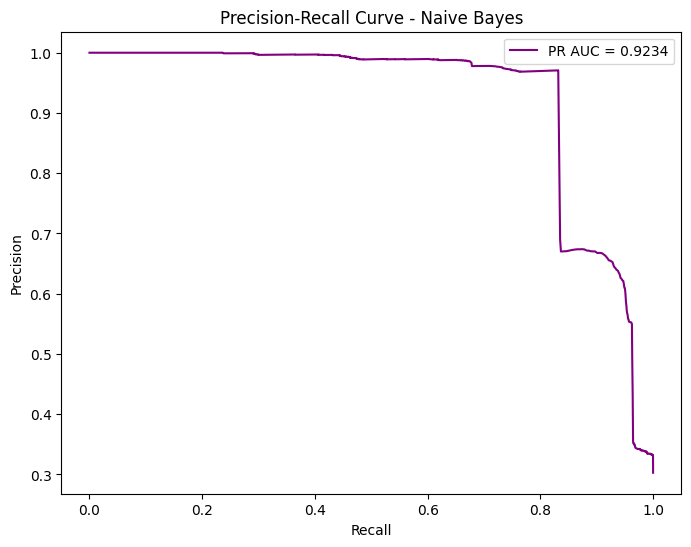

In [573]:
# 5. Precision-Recall Curve
nb_probs = nb_model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, nb_probs)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', label=f"PR AUC = {pr_auc:.4f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Naive Bayes")
plt.legend()
plt.show()

## Confusion matrix

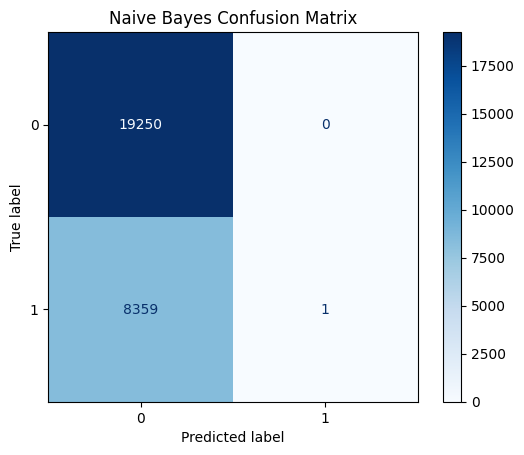

In [574]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(
    naive_bayes, X_test, y_test, cmap=plt.cm.Blues, display_labels=[0, 1]
)
plt.title("Naive Bayes Confusion Matrix")
plt.show()

In [575]:
# 6. Menampilkan Evaluasi dalam Tabel
nb_metrics_df = pd.DataFrame({
    "Metric": ["Accuracy (Train)", "Accuracy (Test)", "F1-Score", "PR AUC"],
    "Value": [nb_train_acc, nb_test_acc, nb_f1, pr_auc]
})

print("\nEvaluation Metrics for Naive Bayes:")
print(nb_metrics_df)


Evaluation Metrics for Naive Bayes:
             Metric     Value
0  Accuracy (Train)  0.701549
1   Accuracy (Test)  0.697247
2          F1-Score  0.000239
3            PR AUC  0.923376


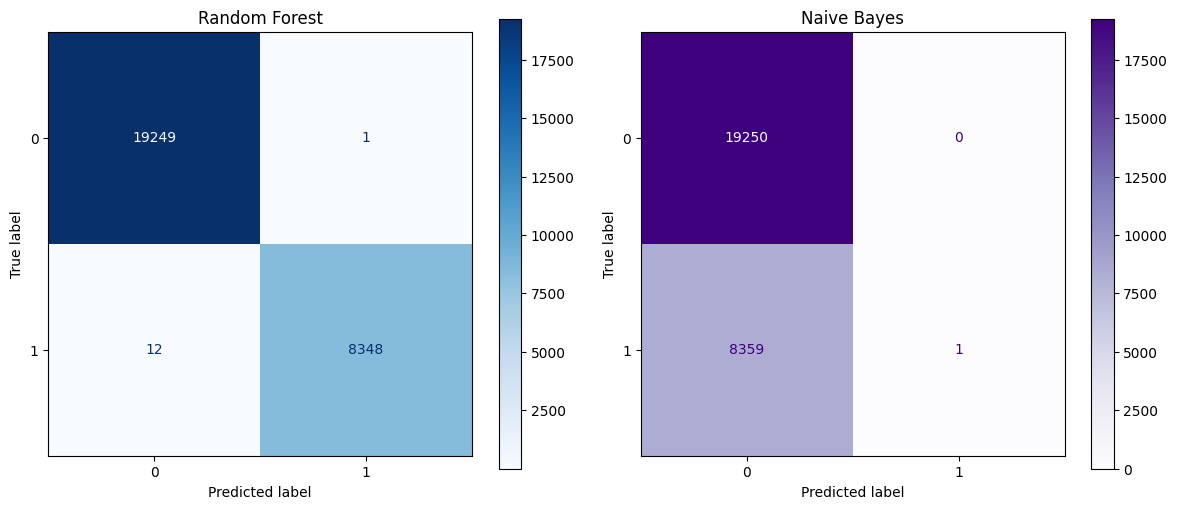

In [576]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Random Forest Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, rf_test_pred, ax=axes[0], cmap='Blues')
axes[0].title.set_text('Random Forest')

# Naive Bayes Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, nb_test_pred, ax=axes[1], cmap='Purples')
axes[1].title.set_text('Naive Bayes')

plt.tight_layout()
plt.show()

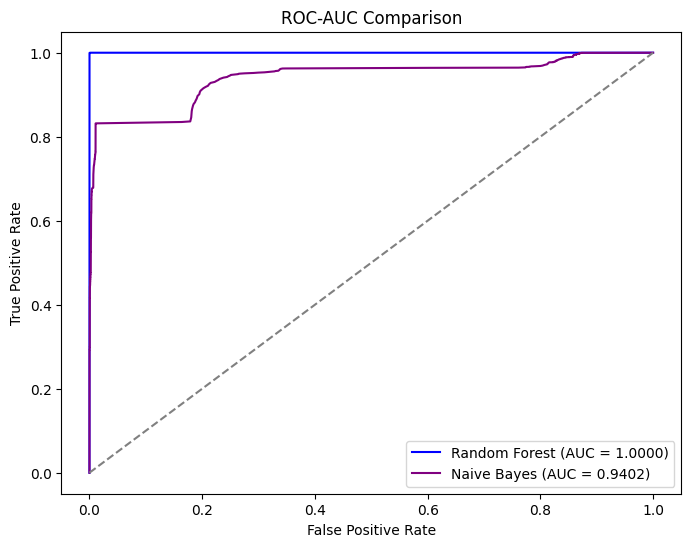

In [577]:
from sklearn.metrics import roc_curve, roc_auc_score

# Random Forest ROC
rf_probs = random_forest.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
auc_rf = roc_auc_score(y_test, rf_probs)

# Naive Bayes ROC
nb_probs = nb_model.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_probs)
auc_nb = roc_auc_score(y_test, nb_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.4f})', color='blue')
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.4f})', color='purple')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Comparison")
plt.legend()
plt.show()


## 3- Neural Network

In [578]:
from tensorflow.keras.layers import Dense
# Import Library untuk Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [579]:
# Membuat model Neural Network
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # Regularisasi dropout
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output layer
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [580]:
# Compile model dengan Adam optimizer
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 loss='binary_crossentropy', metrics=["accuracy"])


In [581]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [582]:
# Training model dengan validation set
history = nn_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
2761/2761 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8955 - loss: 339315872.0000 - val_accuracy: 0.9539 - val_loss: 4590198.5000
Epoch 2/50
2761/2761 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9262 - loss: 14137050.0000 - val_accuracy: 0.9589 - val_loss: 3683795.2500
Epoch 3/50
2761/2761 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9165 - loss: 30306486.0000 - val_accuracy: 0.9576 - val_loss: 5068737.5000
Epoch 4/50
2761/2761 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9198 - loss: 11284245.0000 - val_accuracy: 0.9385 - val_loss: 3392701.5000
Epoch 5/50
2761/2761 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9167 - loss: 6940164.5000 - val_accuracy: 0.9369 - val_loss: 3571137.5000
Epoch 6/50
2761/2761 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9320 - loss: 10057450.0000 - val_accuracy: 0.9327 - val_loss: 921739.2500
Epoch 7/50
2761/2761 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9216 - loss: 820892.8750 - val_accuracy: 0.9306 - val_loss: 114180.500

In [583]:
# 1. Train Model Neural Network
nn_model = MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=500, random_state=42)
nn_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=500, random_state=42)

In [584]:
# 2. Prediksi
nn_train_pred = nn_model.predict(X_train)
nn_test_pred = nn_model.predict(X_test)

In [585]:
# Define model
model = Sequential()
model.add(Dense(16, input_dim=55, activation= "relu")) # Changed input_dim to 55
model.add(Dense(8, activation= "relu"))
model.add(Dense(4, activation= "relu"))
model.add(Dense(1, activation='sigmoid'))
model.summary() #Print model Summary

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_52 (Dense)                     │ (None, 16)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,073 (4.19 KB)

 Trainable params: 1,073 (4.19 KB)

 Non-trainable params: 0 (0.00 B)

In [586]:
# Compile model
model.compile(loss= "binary_crossentropy" , optimizer="rmsprop", metrics=["accuracy"])

In [587]:
# Fit Model
model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
3452/3452 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9453 - loss: 74610944.0000
Epoch 2/5
3452/3452 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9497 - loss: 19216574.0000
Epoch 3/5
3452/3452 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9474 - loss: 10556400.0000
Epoch 4/5
3452/3452 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9523 - loss: 7189708.0000
Epoch 5/5
3452/3452 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9492 - loss: 21347222.0000


In [588]:
# Evaluasi pada data test
test_loss, test_accuracy = model.evaluate(X_test, y_test)  # Use 'model' instead of 'nn_model'
y_pred_nn = (model.predict(X_test) > 0.5).astype(int)  # Use 'model' here as well
f1_nn = f1_score(y_test, y_pred_nn, average='weighted')

print("Neural Network Results:")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test F1-Score: {f1_nn:.4f}")

863/863 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9714 - loss: 33080.1211
863/863 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Neural Network Results:
Test Accuracy: 0.9705
Test F1-Score: 0.9707


## Model evaluation

In [589]:
# Accuracy on the training dataset
trainPred=model.predict(X_train)

trainPred=[1 if y>= 0.5 else 0   for y in trainPred]

accuracy_score(y_train,trainPred)

3452/3452 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


0.970073435533381

In [590]:
# Accuracy on the test dataset
y_prediction=model.predict(X_test)

y_prediction=[1 if y>= 0.5 else 0   for y in y_prediction]

accuracy_score(y_test, y_prediction)

863/863 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


0.9705179282868526

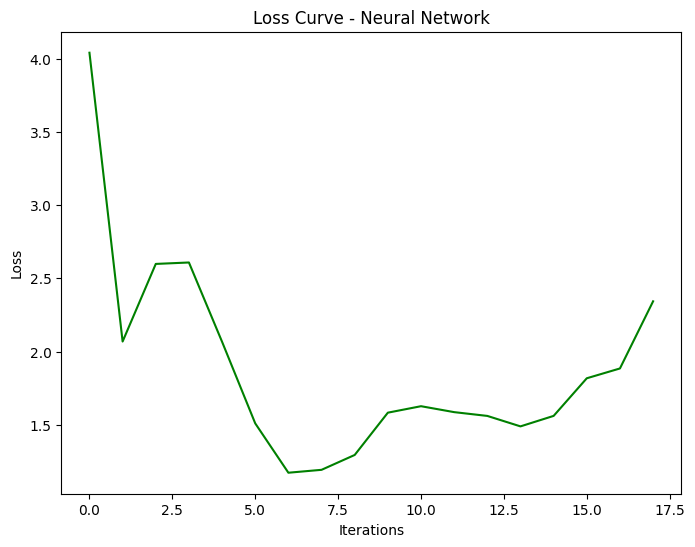

In [591]:
# 4. Loss Curve
plt.figure(figsize=(8, 6))
plt.plot(nn_model.loss_curve_, color='green')
plt.title("Loss Curve - Neural Network")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

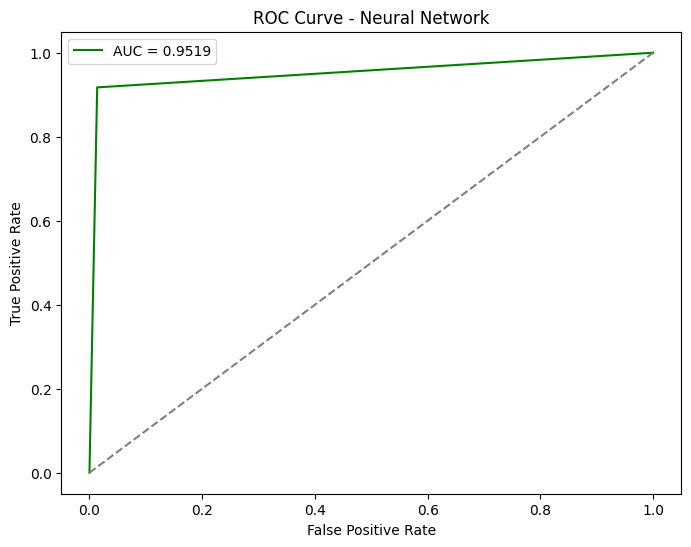

In [592]:
# 5. ROC Curve dan AUC Score
nn_probs = nn_model.predict_proba(X_test)[:, 1]
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_probs)
nn_auc = roc_auc_score(y_test, nn_probs)

plt.figure(figsize=(8, 6))
plt.plot(nn_fpr, nn_tpr, color="green", label=f"AUC = {nn_auc:.4f}")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Neural Network")
plt.legend()
plt.show()

In [593]:
f1_score(y_test,y_prediction)

0.9525142923812857

In [594]:
# 6. Menampilkan Evaluasi dalam Tabel
nn_metrics_df = pd.DataFrame({
    "Metric": ["Accuracy (Train)", "Accuracy (Test)", "F1-Score", "AUC"],
    "Value": [nn_train_acc, nn_test_acc, nn_f1, nn_auc]
})

print("\nEvaluation Metrics for Neural Network:")
print(nn_metrics_df)


Evaluation Metrics for Neural Network:
             Metric     Value
0  Accuracy (Train)  0.963853
1   Accuracy (Test)  0.965411
2          F1-Score  0.941386
3               AUC  0.951873
